In [ ]:
import sys
sys.path.insert(0,'/content/modules')

In [ ]:
!pip install pytorch_pretrained_bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 4.8 MB/s 
     |████████████████████████████████| 132 kB 63.5 MB/s 
     |████████████████████████████████| 10.3 MB 5.7 MB/s 
     |████████████████████████████████| 79 kB 10.3 MB/s 
     |████████████████████████████████| 140 kB 75.4 MB/s 
     |████████████████████████████████| 127 kB 60.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from bert_1layer import *

In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv("/content/Classifier_training_dataset.csv")
df.columns = ['sentence','label']

In [ ]:
df["sentence"] = df["sentence"].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.sentence, df.label,
                                                    stratify=df.label, 
                                                    test_size=0.2)

In [ ]:
d = {'sentence': X_train, 'label': y_train}
train_df = pd.DataFrame(data=d)
test_df = pd.DataFrame({'sentence': X_test, 'label': y_test})

In [ ]:
model = bert_1layer()

100%|██████████| 407873900/407873900 [00:09<00:00, 41517118.76B/s]


In [ ]:
model.fit(train_df)

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1420.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.5706686445924102


Epoch:  25%|██▌       | 1/4 [01:37<04:52, 97.65s/it]

Validation Accuracy: 0.8495273109243697
Train loss: 0.20547990723833687


Epoch:  50%|█████     | 2/4 [03:17<03:18, 99.15s/it]

Validation Accuracy: 0.9067752100840336
Train loss: 0.08527340621641669


Epoch:  75%|███████▌  | 3/4 [04:58<01:39, 99.70s/it]

Validation Accuracy: 0.9070378151260504
Train loss: 0.03717749420034348


Epoch: 100%|██████████| 4/4 [06:38<00:00, 99.59s/it]

Validation Accuracy: 0.8847163865546219


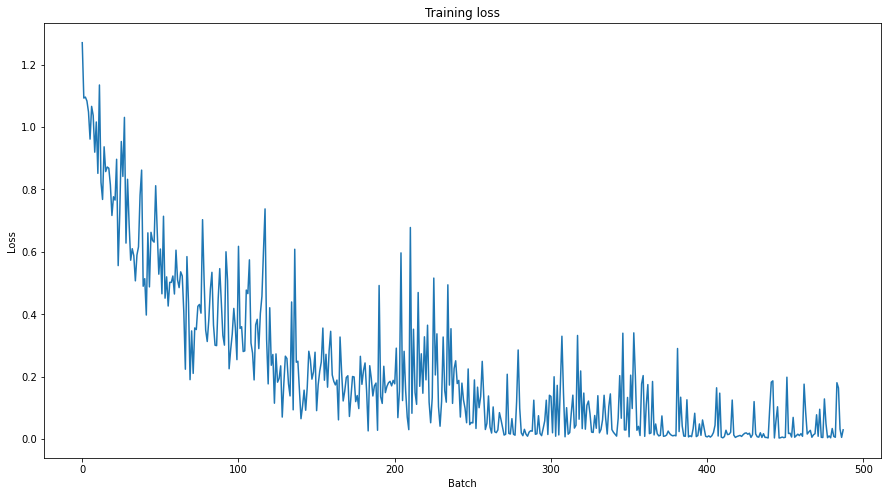

In [ ]:
model.plot_loss()

In [ ]:
model.test_evaluate(test_df)

0.8753070065026791


In [ ]:
path = '/content/trained_model'
torch.save(model.model, path)

In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_processed.csv',nrows=100)

In [ ]:
data_test = df_1['clean_text']